In [73]:
import numpy as np
from scipy.io import loadmat
import random
import math
from itertools import cycle

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model as lm

from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import scale,label_binarize
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, load_boston, load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

import warnings
warnings.simplefilter(action = "ignore") 
import seaborn as sns; sns.set()

%matplotlib inline

## Binary Classification

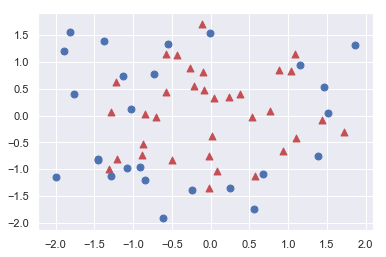

In [37]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.3, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)

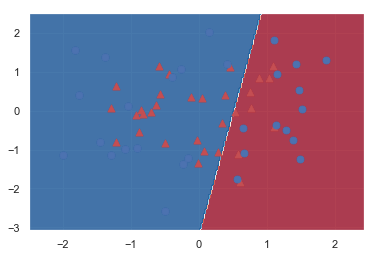

In [82]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.3, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)


clf = LogisticRegression(C=0.01)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
P = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()

In [83]:
P

array([[0.48936008, 0.51063992],
       [0.4894448 , 0.5105552 ],
       [0.48952952, 0.51047048],
       ...,
       [0.5062364 , 0.4937636 ],
       [0.50632114, 0.49367886],
       [0.50640588, 0.49359412]])

In [39]:
print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)
print(clf.n_iter_)

[0 1]
[[ 0.11706992 -0.0106749 ]]
[0.00246809]
[3]


In [40]:
# non-linear (polynomial) expansion
p = 50
pf = PolynomialFeatures(degree=p,include_bias=False)

pf = pf.fit(X_train)
X_train_p = pf.transform(X_train)

X_test = np.c_[xx.ravel(), yy.ravel()]
pf = pf.fit(X_test)
X_test_p = pf.transform(X_test)

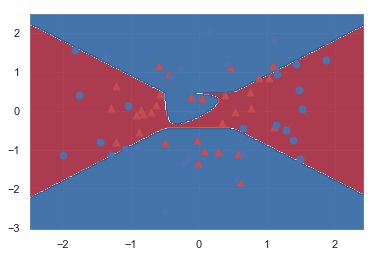

In [86]:
clf = LogisticRegression()
clf.fit(X_train_p, y_train)
mZ = clf.predict(X_test_p)
mZ = mZ.reshape(xx.shape)
plt.contourf(xx, yy, mZ, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()

## Multi-class Classification

In [61]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [63]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [65]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [66]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [67]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [68]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

## Error Evaluation

### ROC/AUC

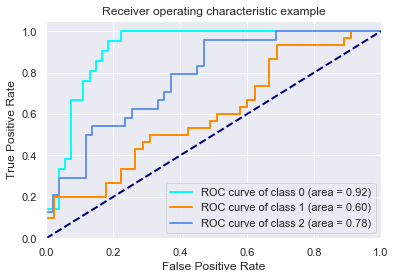

In [74]:
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()